<a href="https://colab.research.google.com/github/nsajwan/line_item_extraction/blob/master/Line_Item_Extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bank statements Line Item Extraction
Based on Cascade TableNet - https://github.com/DevashishPrasad/CascadeTabNet 

## 1. Install all the prerequisite
This will take a while, Remember to **Restart Runtime** after this step is done 

In [2]:
!pip install torch==1.4.0+cu100 torchvision==0.5.0+cu100 -f https://download.pytorch.org/whl/torch_stable.html
!pip install -q mmcv terminaltables
!git clone --branch v1.2.0 'https://github.com/open-mmlab/mmdetection.git'
%cd "mmdetection"
!pip install -r "/content/mmdetection/requirements/optional.txt"
!python setup.py install
!python setup.py develop
!pip install -r {"requirements.txt"}
!pip install pillow==6.2.1 
!pip install mmcv==0.4.3
%cd "/content"
!apt-get install poppler-utils
!pip install pdf2image
!pip install pdfminer
!pip install Pillow

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 723.9MB 25kB/s 
     |████████████████████████████████| 4.1MB 49.3MB/s 
  Found existing installation: torch 1.6.0+cu101
    Uninstalling torch-1.6.0+cu101:
      Successfully uninstalled torch-1.6.0+cu101
  Found existing installation: torchvision 0.7.0+cu101
    Uninstalling torchvision-0.7.0+cu101:
      Successfully uninstalled torchvision-0.7.0+cu101
     |████████████████████████████████| 245kB 8.4MB/s 
     |████████████████████████████████| 194kB 10.5MB/s 
Cloning into 'mmdetection'...
remote: Enumerating objects: 52, done.
remote: Counting objects: 100% (52/52), done.
remote: Compressing objects: 100% (49/49), done.
remote: Total 12930 (delta 13), reused 6 (delta 3), pack-reused 12878
Receiving objects: 100% (12930/12930), 13.68 MiB | 12.86 MiB/s, done.
Resolving deltas: 100% (8689/8689), done.
Note: checking out '0f33c08d8d46eba8165715a0995841a975badfd4'.

You are in '

Streaming output truncated to the last 5000 lines.
   ^~~~~~~~
mmdet/ops/masked_conv/src/masked_conv2d_cuda.cpp:25:3: note: in expansion of macro ‘CHECK_CONTIGUOUS’
   CHECK_CONTIGUOUS(x)
   ^~~~~~~~~~~~~~~~
mmdet/ops/masked_conv/src/masked_conv2d_cuda.cpp:34:3: note: in expansion of macro ‘CHECK_INPUT’
   CHECK_INPUT(col);
   ^
In file included from /usr/local/lib/python3.6/dist-packages/torch/include/c10/core/Device.h:5:0,
                 from /usr/local/lib/python3.6/dist-packages/torch/include/c10/core/Allocator.h:6,
                 from /usr/local/lib/python3.6/dist-packages/torch/include/ATen/ATen.h:3,
                 from /usr/local/lib/python3.6/dist-packages/torch/include/torch/csrc/api/include/torch/types.h:3,
                 from /usr/local/lib/python3.6/dist-packages/torch/include/torch/csrc/api/include/torch/data/dataloader_options.h:4,
                 from /usr/local/lib/python3.6/dist-packages/torch/include/torch/csrc/api/include/torch/data/dataloader/base.h:3,
    

     |████████████████████████████████| 2.1MB 9.6MB/s 
  Found existing installation: Pillow 6.2.2
    Uninstalling Pillow-6.2.2:
      Successfully uninstalled Pillow-6.2.2


     |████████████████████████████████| 61kB 4.4MB/s 
  Created wheel for mmcv: filename=mmcv-0.4.3-cp36-cp36m-linux_x86_64.whl size=170853 sha256=0bb1576318e3eab54a2f99cedc9249ae624ad5dfb05efab8a62a800a7fa3952f
  Stored in directory: /root/.cache/pip/wheels/1e/c3/ee/7eddece4815cfe949be3d489912d22465e244260b587bb05e1
Successfully built mmcv
  Found existing installation: mmcv 1.1.1
    Uninstalling mmcv-1.1.1:
      Successfully uninstalled mmcv-1.1.1
/content
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 154 kB of archives.
After this operation, 613 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 poppler-utils

## 2. Clone the Repository

In [1]:
!rm -rf line_item_extraction
!git clone https://github.com/strangest-quark/line_item_extraction.git

Cloning into 'line_item_extraction'...
remote: Enumerating objects: 84, done.
remote: Counting objects: 100% (84/84), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 84 (delta 34), reused 45 (delta 12), pack-reused 0
Unpacking objects: 100% (84/84), done.


## 3. Pdf to Images and XML


In [42]:
!rm -rf /content/line_item_extraction/results
import os
from pdf2image import convert_from_path, convert_from_bytes
from PIL import Image
import subprocess

from pdfminer.converter import TextConverter
from pdfminer.pdfinterp import PDFPageInterpreter
from pdfminer.pdfinterp import PDFResourceManager
from pdfminer.pdfpage import PDFPage


pdf_directory = '/content/line_item_extraction/sample_docs'
res_directory = '/content/line_item_extraction/results'
cmd = 'pdftohtml -i -c -noframes -xml '
cmd2 = 'pdf2txt.py -t xml '
results = []

# def extract_text_from_pdf(pdf_path):
#     resource_manager = PDFResourceManager()
#     fake_file_handle = io.StringIO()
#     converter = XMLConverter(resource_manager, fake_file_handle)
#     page_interpreter = PDFPageInterpreter(resource_manager, converter)
    
#     with open(pdf_path, 'rb') as fh:
#         for page in PDFPage.get_pages(fh, 
#                                       caching=True,
#                                       check_extractable=True):
#             page_interpreter.process_page(page)
            
#         text = fake_file_handle.getvalue()
    
#     # close open handles
#     converter.close()
#     fake_file_handle.close()
    
#     if text:
#         return text



for filename in os.listdir(pdf_directory):
    if filename.endswith(".pdf"):
      print(filename)
      
      
      os.makedirs(res_directory+'/'+filename[:-4])
      full_cmd = cmd+pdf_directory+'/'+filename+' '+res_directory+'/'+filename[:-4]+'/'+filename[:-4]+'.xml'
      print(full_cmd)
      #print(extract_text_from_pdf(pdf_directory+'/'+filename))
      full_cmd = cmd2+ '-O ' + res_directory+'/'+filename[:-4] + '/ -o ' + filename[:-4]+'.xml -d ' + pdf_directory+'/'+filename
      #full_cmd = cmd+pdf_directory+'/'+filename+' '+res_directory+'/'+filename[:-4]+'/'+filename[:-4]+'.xml'
      print(full_cmd)
      print(" ")
      !{full_cmd}
      images = convert_from_path(pdf_directory+'/'+filename)
      i = 0
      print(i)
      os.makedirs(res_directory+'/'+filename[:-4]+'/img')
      for image in images:
        image.save(res_directory+'/'+filename[:-4]+'/img/'+str(i)+'.png', format='PNG')
        i=i+1
 




RedactedPayPal_sample3.pdf
pdftohtml -i -c -noframes -xml /content/line_item_extraction/sample_docs/RedactedPayPal_sample3.pdf /content/line_item_extraction/results/RedactedPayPal_sample3/RedactedPayPal_sample3.xml
pdf2txt.py -t xml -O /content/line_item_extraction/results/RedactedPayPal_sample3/ -o RedactedPayPal_sample3.xml -d /content/line_item_extraction/sample_docs/RedactedPayPal_sample3.pdf
 
Traceback (most recent call last):
  File "/usr/local/bin/pdf2txt.py", line 115, in <module>
    if __name__ == '__main__': sys.exit(main(sys.argv))
  File "/usr/local/bin/pdf2txt.py", line 110, in main
    interpreter.process_page(page)
  File "/usr/local/lib/python3.6/dist-packages/pdfminer/pdfinterp.py", line 842, in process_page
    self.device.end_page(page)
  File "/usr/local/lib/python3.6/dist-packages/pdfminer/converter.py", line 50, in end_page
    self.receive_layout(self.cur_item)
  File "/usr/local/lib/python3.6/dist-packages/pdfminer/converter.py", line 496, in receive_layout
  

## 3. Download the Pretrained Model


In [18]:
!gdown "https://drive.google.com/u/0/uc?id=1-QieHkR1Q7CXuBu4fp3rYrvDG9j26eFT"

Downloading...
From: https://drive.google.com/u/0/uc?id=1-QieHkR1Q7CXuBu4fp3rYrvDG9j26eFT
To: /content/epoch_36.pth
664MB [00:06, 98.5MB/s]


## 4. Run the Predictions

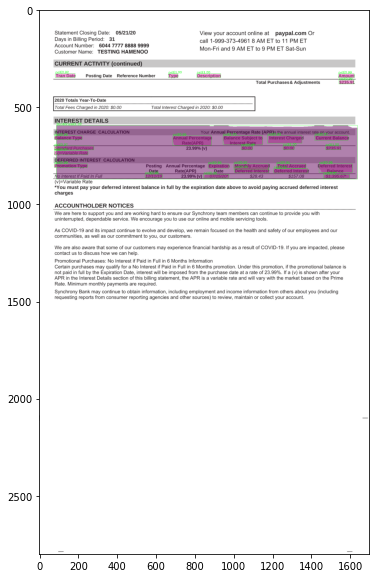

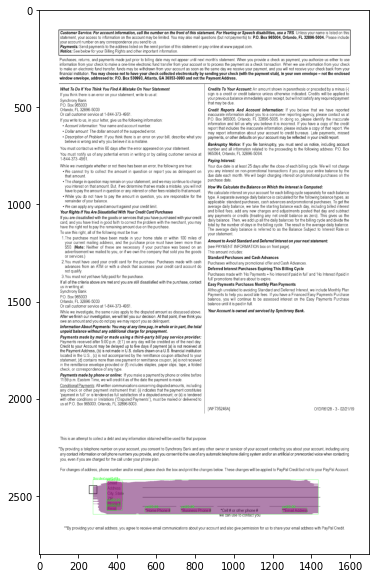

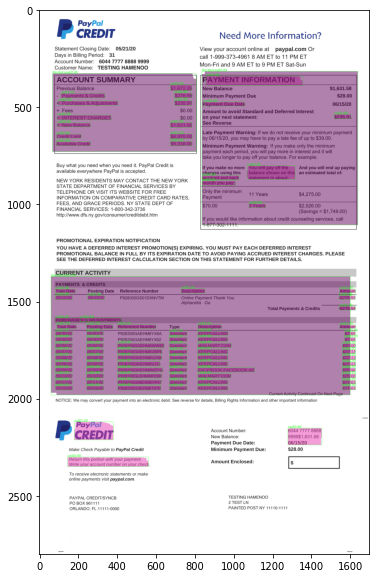

In [35]:
from mmdet.apis import init_detector, inference_detector, show_result_pyplot
import mmcv
# Load model
config_file = '/content/line_item_extraction/config/cascade_mask_rcnn_hrnetv2p_w32_20e.py'
checkpoint_file = '/content/epoch_36.pth'
# build the model from a config file and a checkpoint file
"""Initialize a detector from config file.
Args:
    Config file path
    Checkpoint path. If left as None, the model  
        will not load any weights.  
Returns:
    nn.Module: The constructed detector."""
model = init_detector(config_file, checkpoint_file, device='cuda:0')

directory = '/content/line_item_extraction/results/RedactedPayPal_sample3/img/'

results = []

for filename in os.listdir(directory):
    if filename.endswith(".png"):
      # Run Inference
      """ 
      Inference image(s) with the detector.
   Args:
    model (nn.Module): The loaded detector.  
    imgs (str/ndarray or list[str/ndarray]): Either image files or loaded  
        images.  
  Returns:
    If imgs is a str, a generator will be returned, otherwise return the  
    detection results directly.
      """
      results.append(inference_detector(model, directory+'/'+filename))
      # Visualization results
      """
      Visualize the detection results on the image.
Args:
    img (str or np.ndarray): Image filename or loaded image.  
    result (tuple[list] or list): The detection result, can be either  
        (bbox, segm) or just bbox.  
    class_names (list[str] or tuple[str]): A list of class names.  
    score_thr (float): The threshold to visualize the bboxes and masks.  
    fig_size (tuple): Figure size of the pyplot figure.  
    out_file (str, optional): If specified, the visualization result will  
        be written to the out file instead of shown in a window.  
      """
      show_result_pyplot(directory+'/'+filename, results[-1],('Bordered', 'cell', 'Borderless'), score_thr=0.85)

After this, use TSR postprocessing for best result

In [36]:
%cd "/content"
from line_item_extraction.border_main import border
import lxml.etree as etree
import cv2
from google.colab.patches import cv2_imshow
from mmdet.apis import inference_detector, show_result, init_detector
import glob
from line_item_extraction.cell_text import borderless

result = results[0]

image_path = '/content/line_item_extraction/results/RedactedPayPal_sample3/img/'
xmlPath = '/content/line_item_extraction/results/'

config_fname = "/content/line_item_extraction/config/cascade_mask_rcnn_hrnetv2p_w32_20e.py" 
checkpoint_path = "/content/"
epoch = 'epoch_36.pth'

model = init_detector(config_fname, checkpoint_path+epoch)

imgs=[]

# List of images in the image_path
for filename in os.listdir(image_path):
    if filename.endswith(".png"):
      imgs.append(image_path+filename)
print(imgs)
for i in imgs:
  for i in imgs:
    try:
      result = inference_detector(model, i)
      res_border = []
      res_bless = []
      res_cell = []
      root = etree.Element("document")
      ## for border
      for r in result[0][0]:
        if r[4] > .85:
            res_border.append(r[:4].astype(int))
      ## for cells
      for r in result[0][1]:
          if r[4] > .85:
              r[4] = r[4] * 100
              res_cell.append(r.astype(int))
      ## for borderless
      for r in result[0][2]:
          if r[4] > .85:
              res_bless.append(r[:4].astype(int))

      ## if border tables detected
      if len(res_border) != 0:
          ## call border script for each table in image
          for res in res_border:
              try:
                  root.append(border(res, cv2.imread(i)))
              except:
                  pass
      if len(res_bless) != 0:
          if len(res_cell) != 0:
              for no, res in enumerate(res_bless):
                  root.append(borderless(res, cv2.imread(i), res_cell))
      myfile = open(xmlPath + i.split('/')[-1][:-3] + 'xml', "w")
      myfile.write('<?xml version="1.0" encoding="UTF-8"?>\n')
      myfile.write(etree.tostring(root, pretty_print=True, encoding="unicode"))
      myfile.close()
    except e:
      print("Error")
      

/content
['/content/line_item_extraction/results/RedactedPayPal_sample3/img/2.png', '/content/line_item_extraction/results/RedactedPayPal_sample3/img/1.png', '/content/line_item_extraction/results/RedactedPayPal_sample3/img/0.png']
[Table status] : Processing table with lines
[Table status] : Processing table with lines
[Table status] : Processing table with lines
[Table status] : Processing table with lines
[Table status] : Processing table with lines
[Table status] : Processing table with lines
[Table status] : Processing table with lines
[Table status] : Processing table with lines
[Table status] : Processing table with lines
[Table status] : Processing table with lines
[Table status] : Processing table with lines
[Table status] : Processing table with lines
[Table status] : Processing table with lines
[Table status] : Processing table with lines
[Table status] : Processing table with lines


In [51]:
!pip install pdfrw
from pdfrw import PdfReader
pdf = PdfReader('/content/line_item_extraction/sample_docs/RedactedPayPal_sample3.pdf')
from PIL import Image
im = Image.open('/content/line_item_extraction/results/RedactedPayPal_sample3/img/0.png')

def TranslateFromMachineCode(src, pdf, im):
        print("src==>",src)
        print("pdf==>",pdf)
        print("im==>",im.size,im)
        sx0, sy0, sx1, sy1 = src
        print(len(pdf.pages))
        pdfWidth, pdfHeight = (int(pdf.pages[0].MediaBox[2]),int(pdf.pages[0].MediaBox[3]))
        print("pdfWidth, pdfHeight",pdfWidth, pdfHeight) # size of pdf 612x1008
        imageWidth, imageHeight = im.size # size of png image 612x1008.  #1700x2800
        print("imageWidth, imageHeight-->",imageWidth, imageHeight)
        sy01 = imageHeight-sy1 
        sy11 = imageHeight-sy0
        print("sy01, sy11-->",sy01, sy11)
        x0 = sx0/imageWidth*pdfWidth
        x1 = sx1/imageWidth*pdfWidth
        y0 = sy01/imageHeight*pdfHeight
        y1 = sy11/imageHeight*pdfHeight
        #(85.33333333333333, 1468.2444444444445, 171.82222222222222, 1493.9333333333334)
        return (x0, y0, x1, y1)

TranslateFromMachineCodeAQWASZ((84,1473,173,1489), pdf, im)

src==> (84, 1473, 173, 1489)
pdf==> {'/Root': {'/Metadata': (13, 0), '/Pages': {'/Count': '3', '/Kids': [{'/Contents': (141, 0), '/CropBox': ['0', '0', '612', '1008'], '/MediaBox': ['0', '0', '612', '1008'], '/Parent': {...}, '/Resources': {'/Font': {'/C2_0': (88, 0), '/C2_1': (69, 0), '/C2_10': (81, 0), '/C2_2': {'/BaseFont': '/NDFZKW+Helvetica-Bold', '/DescendantFonts': [{'/BaseFont': '/NDFZKW+Helvetica-Bold', '/CIDSystemInfo': {'/Ordering': '(Identity)', '/Registry': '(Adobe)', '/Supplement': '0'}, '/CIDToGIDMap': '/Identity', '/DW': '1000', '/FontDescriptor': {'/Ascent': '1159', '/CIDSet': (36, 0), '/CapHeight': '720', '/Descent': '-481', '/Flags': '4', '/FontBBox': ['-1018', '-481', '1437', '1159'], '/FontFile2': (35, 0), '/FontName': '/NDFZKW+Helvetica-Bold', '/FontStretch': '/Normal', '/FontWeight': '700', '/ItalicAngle': '0', '/StemV': '140', '/Type': '/FontDescriptor', '/XHeight': '531'}, '/Subtype': '/CIDFontType2', '/Type': '/Font', '/W': ['0', ['722', '0', '278', '278', '33

(30.24, 471.96, 62.28, 477.71999999999997)